In [1]:
#### import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

# DropSeq

In [2]:
sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_dropseq_sub_whitelist/SRR1853178.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853179.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853180.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853181.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853182.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853183.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853184.Solo.out/Gene/Summary.csv']

In [3]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_dropseq_sub_whitelist/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [4]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
78,348070800.0,0.438338,0.802721,0.763639,0.620943,0.545695,0.545695,0.189384,0.184095,2835.0,43441146.0,0.677940,15323.0,11890.0,7760215.0,2737.0,2030.0,1547.0,1298.0,22008.0
79,474642000.0,0.472913,0.835262,0.771174,0.620949,0.543406,0.543406,0.211438,0.205259,2383.0,58081056.0,0.596165,24373.0,18995.0,8249998.0,3462.0,2639.0,1846.0,1603.0,22285.0
80,322756560.0,0.503067,0.880514,0.787011,0.566501,0.542113,0.542113,0.219080,0.212778,1753.0,44625739.0,0.649805,25456.0,19192.0,4509862.0,2572.0,1885.0,1469.0,1228.0,21628.0
81,403445700.0,0.578215,0.735563,0.743126,0.608497,0.332305,0.332305,0.147068,0.143087,1904.0,35197856.0,0.609721,18486.0,13767.0,8463671.0,4445.0,3277.0,2136.0,1835.0,22185.0
82,403445700.0,0.529607,0.818202,0.828078,0.637601,0.535420,0.535420,0.239946,0.233264,2335.0,60681195.0,0.644794,25987.0,20242.0,10165214.0,4353.0,3258.0,2116.0,1810.0,22640.0
83,436670640.0,0.608171,0.898480,0.838650,0.591365,0.551566,0.551566,0.303512,0.295338,2377.0,84715715.0,0.656886,35639.0,27523.0,7397081.0,3111.0,2310.0,1720.0,1456.0,22139.0
84,210952000.0,0.335440,0.682060,0.788351,0.600760,0.562336,0.562336,0.161819,0.156963,1962.0,22170916.0,0.669581,11300.0,8203.0,6629449.0,3378.0,2419.0,1751.0,1468.0,20655.0


In [5]:
metadata.sum()

0
Number of Reads                                        2.599983e+09
Reads With Valid Barcodes                              3.465751e+00
Sequencing Saturation                                  5.652802e+00
Q30 Bases in CB+UMI                                    5.520029e+00
Q30 Bases in RNA read                                  4.246616e+00
Reads Mapped to Genome: Unique+Multiple                3.612841e+00
Reads Mapped to Genome: Unique                         3.612841e+00
Reads Mapped to Transcriptome: Unique+Multipe Genes    1.472247e+00
Reads Mapped to Transcriptome: Unique Genes            1.430784e+00
Estimated Number of Cells                              1.554900e+04
Reads in Cells Mapped to Unique Genes                  3.489136e+08
Fraction of Reads in Cells                             4.504892e+00
Mean Reads per Cell                                    1.565640e+05
Median Reads per Cell                                  1.198120e+05
UMIs in Cells                                 

In [6]:
metadata.mean()

0
Number of Reads                                        3.714262e+08
Reads With Valid Barcodes                              4.951073e-01
Sequencing Saturation                                  8.075431e-01
Q30 Bases in CB+UMI                                    7.885756e-01
Q30 Bases in RNA read                                  6.066594e-01
Reads Mapped to Genome: Unique+Multiple                5.161201e-01
Reads Mapped to Genome: Unique                         5.161201e-01
Reads Mapped to Transcriptome: Unique+Multipe Genes    2.103210e-01
Reads Mapped to Transcriptome: Unique Genes            2.043977e-01
Estimated Number of Cells                              2.221286e+03
Reads in Cells Mapped to Unique Genes                  4.984480e+07
Fraction of Reads in Cells                             6.435560e-01
Mean Reads per Cell                                    2.236629e+04
Median Reads per Cell                                  1.711600e+04
UMIs in Cells                                 

Note that the per cell numbers use STARsolo's filter (only detects 15k cells instead of 49k)

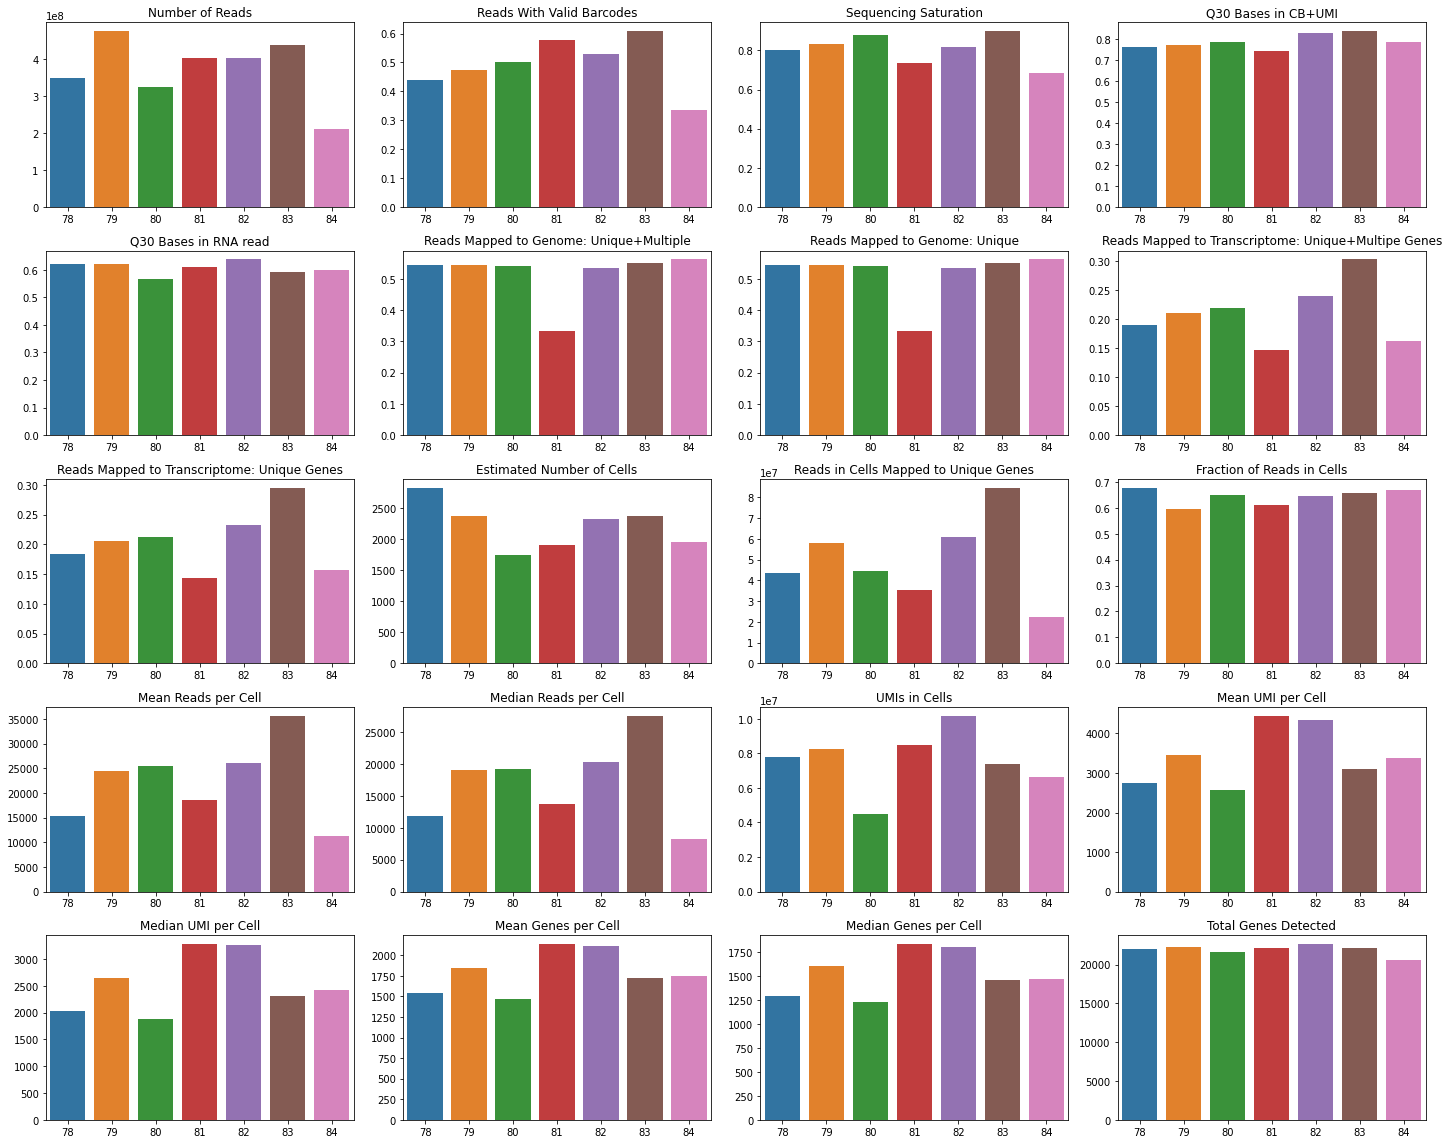

In [7]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/dropseq_starsoloqc_sub_whitelist.png', dpi=150)
plt.show()
plt.close()

In [8]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

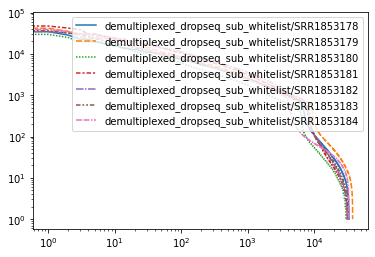

In [9]:
ax = sns.lineplot(data=barcode_rank_df)
ax.set_xscale('log')
ax.set_yscale('log')

Please note that this kneeplot is artificially good!!! All non-cells on the right of the knee are barcodes with 1 mismatch to the artificial whitelist (barcodes to left of knee). thousands of barcodes have already been removed during the barcode filtering stage.

In [10]:
ncells_dict = {
    '78': 6600,
    '79': 9000,
    '80': 6120,
    '81': 7650,
    '82': 7650,
    '83': 8280,
    '84': 4000,
}


In [132]:
sum([ncells_dict[x] for x in ncells_dict.keys()])

49300

In [11]:
barcode_rank_df.columns

Index(['demultiplexed_dropseq_sub_whitelist/SRR1853178',
       'demultiplexed_dropseq_sub_whitelist/SRR1853179',
       'demultiplexed_dropseq_sub_whitelist/SRR1853180',
       'demultiplexed_dropseq_sub_whitelist/SRR1853181',
       'demultiplexed_dropseq_sub_whitelist/SRR1853182',
       'demultiplexed_dropseq_sub_whitelist/SRR1853183',
       'demultiplexed_dropseq_sub_whitelist/SRR1853184'],
      dtype='object')

In [12]:
barcode_rank_df.columns = [barcode_rank_df.columns[x].replace('demultiplexed_dropseq_sub_whitelist/SRR18531', '') for x in range(len(barcode_rank_df.columns))]

In [13]:
sum_incells = 0
for sample in barcode_rank_df.columns:
    incells = barcode_rank_df[sample][0:ncells_dict[sample]-1].sum()
    print(incells)
    sum_incells = sum_incells + incells
    outcells = barcode_rank_df[sample][ncells_dict[sample]:].sum()
    total = barcode_rank_df[sample].sum()
    print(incells/total)

11165764.0
0.8832790072828945
14441183
0.8997888660124749
7439290.0
0.906590567535988
14245056.0
0.9331619562535133
15937305.0
0.9315229468690802
12136458.0
0.9269745604121185
8922890.0
0.8475774261027429


In [14]:
sum_incells

84287946.0

Please note that this FRIC is artificially good!!! All non-cells on the right of the knee are barcodes with 1 mismatch to the artificial whitelist (barcodes to left of knee). thousands of barcodes have already been removed during the barcode filtering stage.

# inDrop

In [15]:
sorted(glob.glob('demultiplexed_indrop_index/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_indrop_index/SRR10545068.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545069.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545070.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545071.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545072.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545073.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545074.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545075.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545076.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545077.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545078.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545079.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/merged.Solo.out/Gene/Summary.csv']

In [16]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_indrop_index/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

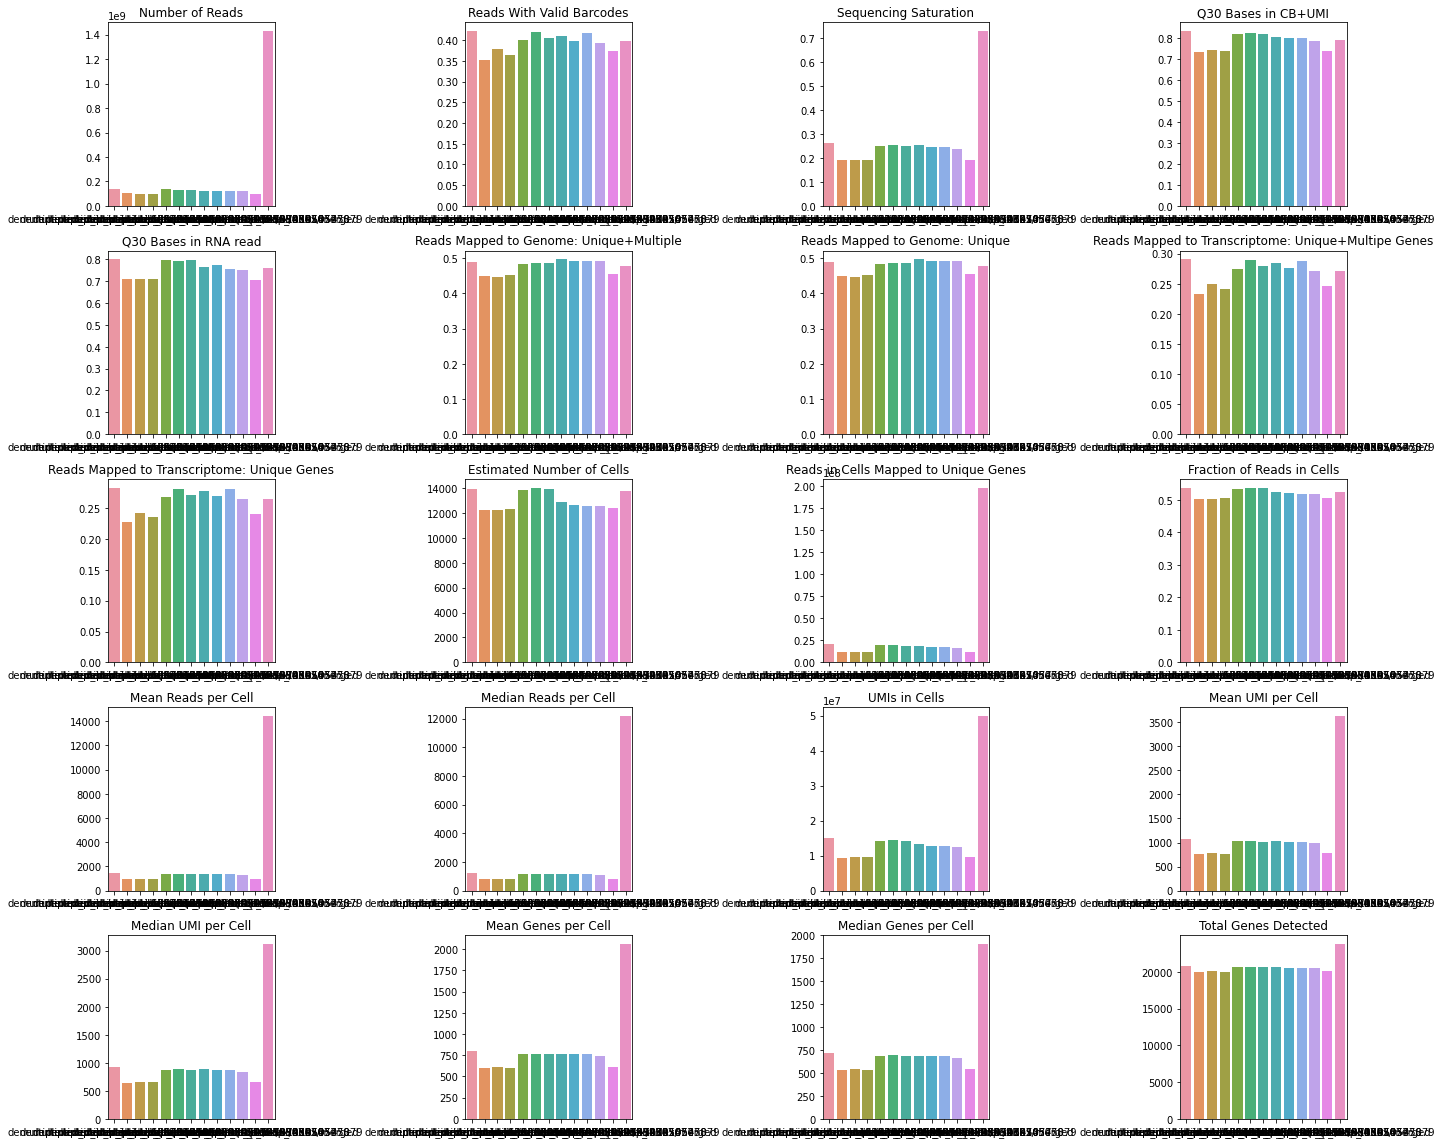

In [17]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/indrop_starsoloqc.png', dpi=150)
plt.show()
plt.close()

This is quite revealing. Note that the last sample (pinkish) matches our expectations: when you correctly merge all the fastqs, and then perform correct barcode demultiplexing, you get the expected number of median umis/genes.

In [18]:
metadata['reads_per_cell'] = metadata['Number of Reads']/metadata['Estimated Number of Cells']

In [19]:
metadata['reads_per_cell']

demultiplexed_indrop_index/SRR10545068      9762.981728
demultiplexed_indrop_index/SRR10545069      8403.608189
demultiplexed_indrop_index/SRR10545070      8094.605420
demultiplexed_indrop_index/SRR10545071      8191.120189
demultiplexed_indrop_index/SRR10545072      9725.749621
demultiplexed_indrop_index/SRR10545073      9281.496828
demultiplexed_indrop_index/SRR10545074      9472.159006
demultiplexed_indrop_index/SRR10545075      9782.571906
demultiplexed_indrop_index/SRR10545076      9918.447050
demultiplexed_indrop_index/SRR10545077      9548.167329
demultiplexed_indrop_index/SRR10545078      9640.742864
demultiplexed_indrop_index/SRR10545079      8114.000644
demultiplexed_indrop_index/merged         103957.690651
Name: reads_per_cell, dtype: float64

In [20]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_indrop_index/merged.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [21]:
barcode_rank_df

,demultiplexed_indrop_index/merged
0,41203
1,38021
2,27611
3,25914
4,24172
...,...
1313980,1
1313981,1
1313982,1
1313983,1


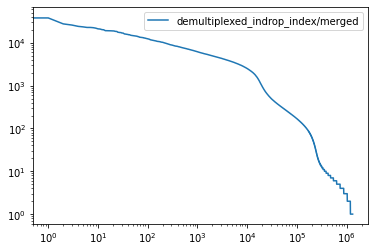

In [22]:
ax = sns.lineplot(data=barcode_rank_df)
ax.set_xscale('log')
ax.set_yscale('log')

In [23]:
barcode_rank_df[0:27093].sum()

demultiplexed_indrop_index/merged    63751280
dtype: int64

In [24]:
barcode_rank_df[27094:].sum()

demultiplexed_indrop_index/merged    38967051
dtype: int64

In [25]:
barcode_rank_df[0:27093].sum()/(barcode_rank_df[0:27093].sum()+barcode_rank_df[27094:].sum())

demultiplexed_indrop_index/merged    0.620642
dtype: float64

Note that around 60% or reads are already discarded for inDrop at the barcode filtering stage, so the real FRIC is ~25%. If the STARsolo numbers are used:

# Generate violin plot

In [26]:
ls tables/*adata*

tables/20210501_adata.h5ad*
tables/dropseq_SRR1853178_adata.tsv
tables/dropseq_SRR1853179_adata.tsv
tables/dropseq_SRR1853180_adata.tsv
tables/dropseq_SRR1853181_adata.tsv
tables/dropseq_SRR1853182_adata.tsv
tables/dropseq_SRR1853183_adata.tsv
tables/dropseq_SRR1853184_adata.tsv
tables/dropseq_whitelisted_SRR1853178_adata.tsv
tables/dropseq_whitelisted_SRR1853179_adata.tsv
tables/dropseq_whitelisted_SRR1853180_adata.tsv
tables/dropseq_whitelisted_SRR1853181_adata.tsv
tables/dropseq_whitelisted_SRR1853182_adata.tsv
tables/dropseq_whitelisted_SRR1853183_adata.tsv
tables/dropseq_whitelisted_SRR1853184_adata.tsv
tables/hydrop_adata.tsv
tables/indrop_merged_adata.tsv


We need these tables:

```
tables/dropseq_whitelisted_SRR1853178_adata.tsv
tables/dropseq_whitelisted_SRR1853179_adata.tsv
tables/dropseq_whitelisted_SRR1853180_adata.tsv
tables/dropseq_whitelisted_SRR1853181_adata.tsv
tables/dropseq_whitelisted_SRR1853182_adata.tsv
tables/dropseq_whitelisted_SRR1853183_adata.tsv
tables/dropseq_whitelisted_SRR1853184_adata.tsv
tables/indrop_merged_adata.tsv
```

In [27]:
#### import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

In [28]:
files = glob.glob('tables/dropseq_whitelisted*_adata.tsv')

In [29]:
files

['tables/dropseq_whitelisted_SRR1853182_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853179_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853184_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853178_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853181_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853180_adata.tsv',
 'tables/dropseq_whitelisted_SRR1853183_adata.tsv']

In [30]:
df_dropseq_adata = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0, header=0)
    df_dropseq_adata = df_dropseq_adata.append(df)

In [31]:
df_dropseq_adata

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
SRR1853182_ACAGATTGGAAC,7526,8.926252,34639.0,10.452765,12.685124,17.841162,25.251884,38.892578
SRR1853182_CAGAATAGGCTT,7144,8.874168,29813.0,10.302733,13.376715,18.709959,26.069164,39.831617
SRR1853182_GAAAAGAACGAG,6971,8.849657,38458.0,10.557348,14.696552,21.995424,31.652712,47.605180
SRR1853182_GCTGGAGTTTCA,6906,8.840291,28311.0,10.251041,13.772032,19.261065,26.713998,40.591996
SRR1853182_GAAATCAACAGT,6504,8.780326,24016.0,10.086517,13.216189,18.479347,25.845270,39.765157
...,...,...,...,...,...,...,...,...
SRR1853183_ATTTATCAGGCA,366,5.905362,510.0,6.236370,33.529412,47.843137,67.450980,100.000000
SRR1853183_AGGGCCATGCAT,366,5.905362,515.0,6.246107,34.368932,48.349515,67.766990,100.000000
SRR1853183_CATTCGCTGGCT,366,5.905362,498.0,6.212606,31.726908,46.586345,66.666667,100.000000
SRR1853183_TGACGATCGCGT,366,5.905362,495.0,6.206576,30.505051,46.262626,66.464646,100.000000


In [32]:
df_dropseq_adata['n_genes_by_counts']

SRR1853182_ACAGATTGGAAC    7526
SRR1853182_CAGAATAGGCTT    7144
SRR1853182_GAAAAGAACGAG    6971
SRR1853182_GCTGGAGTTTCA    6906
SRR1853182_GAAATCAACAGT    6504
                           ... 
SRR1853183_ATTTATCAGGCA     366
SRR1853183_AGGGCCATGCAT     366
SRR1853183_CATTCGCTGGCT     366
SRR1853183_TGACGATCGCGT     366
SRR1853183_TGTTTGAGATTT     365
Name: n_genes_by_counts, Length: 49293, dtype: int64

In [33]:
df_dropseq_adata['n_genes_by_counts'][:28945].median()

840.0

In [34]:
df_dropseq_adata['total_counts']

SRR1853182_ACAGATTGGAAC    34639.0
SRR1853182_CAGAATAGGCTT    29813.0
SRR1853182_GAAAAGAACGAG    38458.0
SRR1853182_GCTGGAGTTTCA    28311.0
SRR1853182_GAAATCAACAGT    24016.0
                            ...   
SRR1853183_ATTTATCAGGCA      510.0
SRR1853183_AGGGCCATGCAT      515.0
SRR1853183_CATTCGCTGGCT      498.0
SRR1853183_TGACGATCGCGT      495.0
SRR1853183_TGTTTGAGATTT      472.0
Name: total_counts, Length: 49293, dtype: float64

In [35]:
df_dropseq_adata['total_counts'][:28945].median()

1244.0

## indrop

In [36]:
files = glob.glob('tables/indrop_merged_adata.tsv')

In [37]:
files

['tables/indrop_merged_adata.tsv']

In [38]:
df_indrop_adata = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0, header=0)
    df_indrop_adata = df_indrop_adata.append(df)

In [39]:
df_indrop_adata

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
merged_CTCCTCCA_ATTAGACG_TGTTCCAG,8136,9.004177,41203.0,10.626290,8.564910,14.045094,21.556683,35.363930
merged_GGCGACAA_TCTTACGC_GCGCATTC,8129,9.003316,38021.0,10.545920,8.784619,14.284211,21.929986,36.009048
merged_CAAGGTAC_ATTAGACG_ATCCGCTA,7448,8.915835,27611.0,10.226006,9.836659,14.975915,21.889827,35.478614
merged_AAGGGACC_ATAGCCTT_CCATTTGA,6867,8.834628,25914.0,10.162578,10.963186,16.975380,24.507988,38.666358
merged_GGCCCAAT_ACTCTAGG_TTGTGACT,6837,8.830251,24172.0,10.092992,11.662254,17.160351,24.652490,38.528049
...,...,...,...,...,...,...,...,...
merged_TCTGATTT_CTAGTCGA_CTCTTGAC,490,6.196444,576.0,6.357842,21.180556,32.291667,49.652778,100.000000
merged_ACCAGTTT_ATAGCCTT_GGGAAGGT,490,6.196444,555.0,6.320768,20.720721,29.729730,47.747748,100.000000
merged_ATTTGTTG_CTAGTCGA_GAGTTTCG,490,6.196444,568.0,6.343881,20.598592,31.338028,48.943662,100.000000
merged_TCTAAACT_TAAGGCTC_AACACACG,489,6.194405,539.0,6.291569,18.552876,27.829314,46.382189,100.000000


In [40]:
df_indrop_adata['n_genes_by_counts']

merged_CTCCTCCA_ATTAGACG_TGTTCCAG    8136
merged_GGCGACAA_TCTTACGC_GCGCATTC    8129
merged_CAAGGTAC_ATTAGACG_ATCCGCTA    7448
merged_AAGGGACC_ATAGCCTT_CCATTTGA    6867
merged_GGCCCAAT_ACTCTAGG_TTGTGACT    6837
                                     ... 
merged_TCTGATTT_CTAGTCGA_CTCTTGAC     490
merged_ACCAGTTT_ATAGCCTT_GGGAAGGT     490
merged_ATTTGTTG_CTAGTCGA_GAGTTTCG     490
merged_TCTAAACT_TAAGGCTC_AACACACG     489
merged_AACGATTT_TAAGGCTC_AGAAGTTA     489
Name: n_genes_by_counts, Length: 27093, dtype: int64

In [41]:
df_indrop_adata['n_genes_by_counts'][:20845].median()

1578.0

In [42]:
df_indrop_adata['total_counts']

merged_CTCCTCCA_ATTAGACG_TGTTCCAG    41203.0
merged_GGCGACAA_TCTTACGC_GCGCATTC    38021.0
merged_CAAGGTAC_ATTAGACG_ATCCGCTA    27611.0
merged_AAGGGACC_ATAGCCTT_CCATTTGA    25914.0
merged_GGCCCAAT_ACTCTAGG_TTGTGACT    24172.0
                                      ...   
merged_TCTGATTT_CTAGTCGA_CTCTTGAC      576.0
merged_ACCAGTTT_ATAGCCTT_GGGAAGGT      555.0
merged_ATTTGTTG_CTAGTCGA_GAGTTTCG      568.0
merged_TCTAAACT_TAAGGCTC_AACACACG      539.0
merged_AACGATTT_TAAGGCTC_AGAAGTTA      602.0
Name: total_counts, Length: 27093, dtype: float64

In [43]:
df_indrop_adata['total_counts'][:20845].median()

2425.0

## HyDrop - mouse cortex data

our data is filtered by star-solo based on knee. we then convert these cells to h5ad format using scanpy

In [44]:
import scanpy as sc

In [45]:
adata = sc.read('tables/20210501_adata.h5ad')

In [46]:
adata.obs.to_csv('tables/hydrop_adata.tsv',sep='\t')

In [47]:
files = glob.glob('tables/hydrop_adata.tsv')

In [48]:
files

['tables/hydrop_adata.tsv']

In [49]:
df_hydrop_adata = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, sep='\t', index_col=0, header=0)
    df_hydrop_adata = df_hydrop_adata.append(df)

In [50]:
df_hydrop_adata

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,leiden_0.6,leiden_0.9,leiden_1.2,leiden_1,cell_type,cell_type_1,cell_type_finetuned,UMAP_X,UMAP_Y,TSNE_X,TSNE_Y,cell_type_collapsed
A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC,0,2758,2756,7319.0,1.0,0.013663,0.021615,False,0,6,7,7,7-NP-b,7-L2/3,7-L2/3,-0.974888,1.350498,-22.595959,44.505940,L2/3-2
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC,0,3006,3005,8789.0,0.0,0.000000,0.009565,False,10,11,9,9,9-L4-f,9-L4,9-L4,5.260487,7.415311,-39.151596,-52.765900,L4-3
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC,0,2491,2491,5689.0,0.0,0.000000,0.003378,False,5,5,5,6,6-L2/3,6-MGE-Pvalb,6-MGE-Pvalb,-0.638742,18.540974,36.406204,-70.331566,MGE (Pvalb+)
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC,0,1888,1888,4044.0,3.0,0.074184,0.015164,False,2,1,0,1,1-L6-a,1-L6,1-L6,0.096323,-5.338323,49.871860,37.381763,L6
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC,0,2826,2825,7267.0,6.0,0.082565,0.011981,False,2,1,0,1,1-L6-a,1-L6,1-L6,-1.193039,-4.463965,61.126038,29.700691,L6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT,1,934,934,1485.0,1.0,0.067340,0.055646,False,12,15,16,15,15-MOL,15-MOL,15-MOL,-6.744222,8.804398,22.741667,-6.316557,MOL
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT,1,956,956,1544.0,0.0,0.000000,0.025308,False,0,0,2,0,0-L2/3,0-L2/3,0-L2/3,-4.163591,4.043092,-16.213620,12.958341,L2/3-1
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT,1,2708,2707,7717.0,1.0,0.012958,0.040744,False,1,2,6,5,5-MGE-Pvalb,5-L4,5-L4,-0.737559,7.552638,-50.390736,-3.990756,L4-2
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT,1,2232,2231,5113.0,1.0,0.019558,0.015599,False,4,4,4,4,4-L4/5,4-L4/5,4-L4/5,3.978391,2.174218,2.101720,-20.454075,L4/5-2


In [51]:
df_hydrop_adata['n_genes_by_counts']

A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC    2756
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC    3005
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC    2491
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC    1888
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC    2825
                                      ... 
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT     934
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT     956
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT    2707
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT    2231
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT    1176
Name: n_genes_by_counts, Length: 9508, dtype: int64

In [52]:
df_hydrop_adata['total_counts']

A_ATCGACCTTG_ACCAAGCGAA_AACAACCATC    7319.0
A_GAGGTTAATG_ACCAAGCGAA_AACAACCATC    8789.0
A_GATCTAGGTA_ACCTTGTATG_AACAACCATC    5689.0
A_TTAACGAAGG_ACCTTGTATG_AACAACCATC    4044.0
A_ACCTGAGATG_ACGAGACCAA_AACAACCATC    7267.0
                                       ...  
B_CTCCTGAATC_TGTGCTCTAA_TTGGATACGT    1485.0
B_GGATGAGGAG_TTAACAGTCA_TTGGATACGT    1544.0
B_AAGCCGCATA_TTGAGGCATC_TTGGATACGT    7717.0
B_TACATAGAGG_TTGAGGCATC_TTGGATACGT    5113.0
B_TGAGCAATCT_TTGAGGCATC_TTGGATACGT    1845.0
Name: total_counts, Length: 9508, dtype: float64

Plot violin

In [53]:
df_hydrop_ngenes = pd.DataFrame()
df_hydrop_numis = pd.DataFrame()

df_hydrop_ngenes['counts'] = df_hydrop_adata['n_genes_by_counts']
df_hydrop_ngenes['count_type'] = 'ngenes'
df_hydrop_numis['counts'] = df_hydrop_adata['total_counts']
df_hydrop_numis['count_type'] = 'numis'

df_hydrop = df_hydrop_ngenes.append(df_hydrop_numis, ignore_index=True)
df_hydrop['method'] = 'hydrop'

In [54]:
df_indrop_ngenes = pd.DataFrame()
df_indrop_numis = pd.DataFrame()

df_indrop_ngenes['counts'] = df_indrop_adata['n_genes_by_counts']
df_indrop_ngenes['count_type'] = 'ngenes'
df_indrop_numis['counts'] = df_indrop_adata['total_counts']
df_indrop_numis['count_type'] = 'numis'

df_indrop = df_indrop_ngenes.append(df_indrop_numis, ignore_index=True)
df_indrop['method'] = 'indrop'

In [55]:
df_dropseq_ngenes = pd.DataFrame()
df_dropseq_numis = pd.DataFrame()

df_dropseq_ngenes['counts'] = df_dropseq_adata['n_genes_by_counts']
df_dropseq_ngenes['count_type'] = 'ngenes'
df_dropseq_numis['counts'] = df_dropseq_adata['total_counts']
df_dropseq_numis['count_type'] = 'numis'

df_dropseq = df_dropseq_ngenes.append(df_dropseq_numis, ignore_index=True)
df_dropseq['method'] = 'dropseq'

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
context = "talk"
style = "darkgrid"
markersize = 25
plt.close()
sns.set_context(context)
sns.set_style(style, {"axes.linewidth": 1, "axes.edgecolor": ".20"})

In [58]:
df_counts = pd.concat([df_indrop, df_dropseq, df_hydrop], ignore_index=True)

In [59]:
df_counts

,counts,count_type,method
0,8136.0,ngenes,indrop
1,8129.0,ngenes,indrop
2,7448.0,ngenes,indrop
3,6867.0,ngenes,indrop
4,6837.0,ngenes,indrop
...,...,...,...
171783,1485.0,numis,hydrop
171784,1544.0,numis,hydrop
171785,7717.0,numis,hydrop
171786,5113.0,numis,hydrop


In [174]:
df_counts.sort_values(by='count_type', ascending=False)

,counts,count_type,method
171787,1845.0,numis,hydrop
135282,781.0,numis,dropseq
135273,819.0,numis,dropseq
135274,786.0,numis,dropseq
135275,787.0,numis,dropseq
...,...,...,...
75318,2080.0,ngenes,dropseq
75317,2080.0,ngenes,dropseq
75316,2081.0,ngenes,dropseq
75315,2081.0,ngenes,dropseq


In [60]:
df_counts.groupby(['method', 'count_type']).median()

counts
method  count_type        
dropseq ngenes       743.0
        numis       1071.0
hydrop  ngenes      1661.0
        numis       3403.5
indrop  ngenes      1321.0
        numis       1920.0

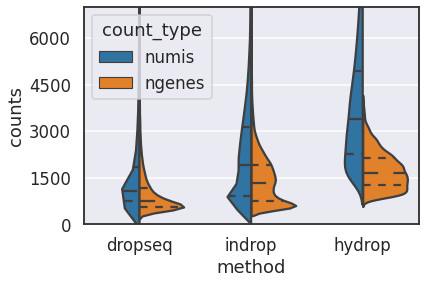

In [175]:
ax = sns.violinplot(data=df_counts.sort_values(by='count_type', ascending=False), y='counts', x='method', hue='count_type', split=True, inner="quartile", size='count', order=[ "dropseq", "indrop", "hydrop"])
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylim([0,7000])
plt.savefig('plts_pub/compar_public.svg')

plt.show()

i can choose not to plot the cells with counts > 7000 in order to smoothen the curve (the number of nodes is fixed, so if we remove outliers, we get a higher density of nodes in the plot)

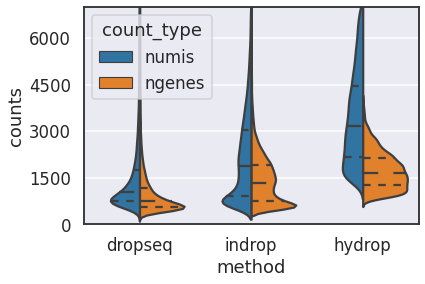

In [176]:
ax = sns.violinplot(data=df_counts[df_counts['counts'] < 7000].sort_values(by='count_type', ascending=False), y='counts', x='method', hue='count_type', split=True, inner="quartile", size='counts', order=[ "dropseq", "indrop", "hydrop"])
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylim([0,7000])
plt.savefig('plts_pub/compar_public_soft.svg', dpi=600)
plt.savefig('plts_pub/compar_public_soft.png', dpi=600)
plt.show()

# STAR stats figure

In [63]:
import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

### HyDrop

In [96]:
files = ['/lustre1/project/stg_00002/lcb/fderop/data/20210428_hydrop-rna_mouse_cortex_10k/demultiplexed/HYR__c47998_e6244b__20210412_mouse_cortex_sbmerged_S4.Solo.out/Gene/Summary.csv', '/lustre1/project/stg_00002/lcb/fderop/data/20210428_hydrop-rna_mouse_cortex_10k/demultiplexed/HYR__666332__20210412_mouse_cortex_sa_S1.Solo.out/Gene/Summary.csv']

In [97]:
metadata = []
for filename in files:
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('lustre1/project/stg_00002/lcb/fderop/data/20210428_hydrop-rna_mouse_cortex_10k/demultiplexed/', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T
metadata_hydrop = metadata

In [98]:
metadata_hydrop

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
/HYR__c47998_e6244b__20210412_mouse_cortex_sbmerged_S4,269012338.0,0.827878,0.659605,0.780043,0.954299,0.859785,0.859785,0.559121,0.550297,4459.0,50489518.0,0.341061,11323.0,9793.0,16851724.0,3779.0,3265.0,1718.0,1624.0,21483.0
/HYR__666332__20210412_mouse_cortex_sa_S1,242071788.0,0.833270,0.551516,0.774848,0.950998,0.859084,0.859084,0.569050,0.560225,5232.0,47987067.0,0.353848,9171.0,7941.0,21186594.0,4049.0,3514.0,1778.0,1693.0,21719.0


In [99]:
269012338 + 242071788 # total reads

511084126

In [100]:
16851724 + 21186594 # UMIs in cells

38038318

In [101]:
4459+5232

9691

Now write a weighted mean

In [102]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
/HYR__c47998_e6244b__20210412_mouse_cortex_sbmerged_S4,269012338.0,0.827878,0.659605,0.780043,0.954299,0.859785,0.859785,0.559121,0.550297,4459.0,50489518.0,0.341061,11323.0,9793.0,16851724.0,3779.0,3265.0,1718.0,1624.0,21483.0
/HYR__666332__20210412_mouse_cortex_sa_S1,242071788.0,0.833270,0.551516,0.774848,0.950998,0.859084,0.859084,0.569050,0.560225,5232.0,47987067.0,0.353848,9171.0,7941.0,21186594.0,4049.0,3514.0,1778.0,1693.0,21719.0


In [103]:
# calculate a weighted mean
metadata_hydrop = pd.DataFrame(pd.DataFrame([metadata.loc[x]*(metadata['Number of Reads']/metadata['Number of Reads'].sum())[x] for x in metadata.index]).sum()).T

In [104]:
metadata_hydrop

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
0,2.562521e+08,0.830432,0.608409,0.777582,0.952736,0.859453,0.859453,0.563824,0.554999,4825.126598,4.930425e+07,0.347117,10303.718709,8915.811826,1.890491e+07,3906.883805,3382.937287,1746.418623,1656.681417,21594.779919


# DropSeq

In [105]:
sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_dropseq_sub_whitelist/SRR1853178.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853179.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853180.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853181.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853182.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853183.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853184.Solo.out/Gene/Summary.csv']

In [106]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_dropseq_sub_whitelist/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T
metadata_dropseq = pd.DataFrame(pd.DataFrame([metadata.loc[x]*(metadata['Number of Reads']/metadata['Number of Reads'].sum())[x] for x in metadata.index]).sum()).T

In [107]:
metadata_dropseq

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
0,3.889752e+08,0.508728,0.816593,0.789335,0.608234,0.512462,0.512462,0.215307,0.209268,2248.362475,5.286319e+07,0.639576,23464.277688,18007.207505,7.775748e+06,3479.485193,2585.81643,1817.198377,1548.095132,22049.154767


In [110]:
metadata['Number of Reads'].sum()

2599983400.0

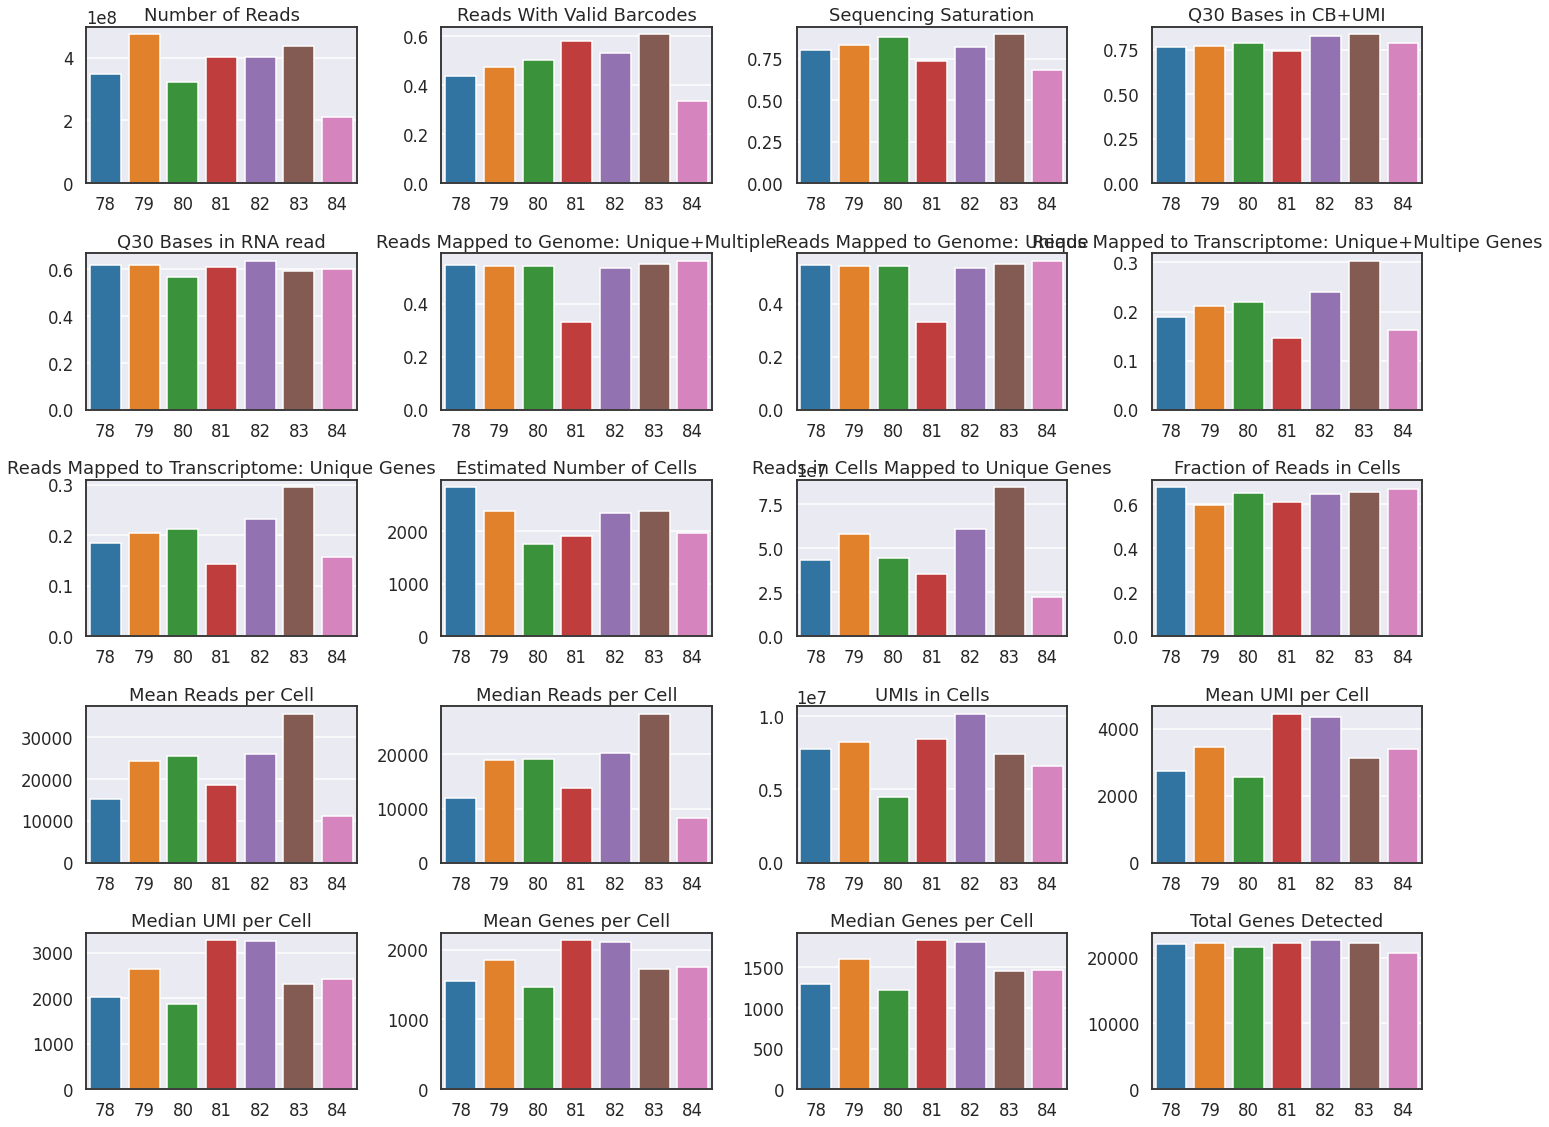

In [109]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/dropseq_starsoloqc.png', dpi=150)
plt.show()
plt.close()

## inDrop

In [111]:
metadata = []
for filename in ['demultiplexed_indrop_index/merged.Solo.out/Gene/Summary.csv']:
    x = pd.read_csv(filename, header=None, index_col = 0)
    x.columns = ['inDrop']
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T
metadata_indrop = pd.DataFrame(pd.DataFrame([metadata.loc[x]*(metadata['Number of Reads']/metadata['Number of Reads'].sum())[x] for x in metadata.index]).sum()).T

In [112]:
metadata_indrop

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
0,1.428898e+09,0.397455,0.728477,0.792105,0.760707,0.478757,0.478757,0.271843,0.264754,13745.0,198343219.0,0.524293,14430.0,12198.0,49900670.0,3630.0,3117.0,2059.0,1905.0,23758.0


In [113]:
int(metadata_indrop['Number of Reads'])

1428898458

# 10x

In [114]:
metadata = []
for filename in ['10x/nuclei_2k_metrics_summary.csv']:
    x = pd.read_csv(filename, header=0, sep=',')
    x.rename(index={0: '10x 2k Nuclei'}, inplace=True) 
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata_10x_2k = metadata

In [115]:
x

,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Valid Barcodes,Sequencing Saturation,Q30 Bases in Barcode,Q30 Bases in RNA Read,Q30 Bases in Sample Index,Q30 Bases in UMI,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Exonic Regions,Reads Mapped Confidently to Transcriptome,Reads Mapped Antisense to Gene,Fraction Reads in Cells,Total Genes Detected,Median UMI Counts per Cell
10x 2k Nuclei,2352,50485,775,118742315,0.974,0.833,0.983,0.679,0.94,0.981,0.811,0.793,0.069,0.46,0.263,0.235,0.019,0.7,17059,1127


In [116]:
metadata_10x_2k.columns = ['Estimated Number of Cells', 'Mean Reads per Cell',
       'Median Genes per Cell', 'Number of Reads', 'Reads With Valid Barcodes',
       'Sequencing Saturation', 'Q30 Bases in CB+UMI',
       'Q30 Bases in RNA read', 'Q30 Bases in Sample Index',
       'Q30 Bases in UMI', 'Reads Mapped to Genome: Unique+Multiple',
       'Reads Mapped to Genome: Unique',
       'Reads Mapped Confidently to Intergenic Regions',
       'Reads Mapped Confidently to Intronic Regions',
       'Reads Mapped Confidently to Exonic Regions',
       'Reads Mapped to Transcriptome: Unique Genes',
       'Reads Mapped Antisense to Gene', 'Fraction of Reads in Cells',
       'Total Genes Detected', 'Median UMI per Cell']

In [117]:
metadata_10x_2k

,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Q30 Bases in Sample Index,Q30 Bases in UMI,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Exonic Regions,Reads Mapped to Transcriptome: Unique Genes,Reads Mapped Antisense to Gene,Fraction of Reads in Cells,Total Genes Detected,Median UMI per Cell
10x 2k Nuclei,2352,50485,775,118742315,0.974,0.833,0.983,0.679,0.94,0.981,0.811,0.793,0.069,0.46,0.263,0.235,0.019,0.7,17059,1127


In [118]:
metadata_10x_2k['Number of Reads']/metadata_10x_2k['Estimated Number of Cells']

10x 2k Nuclei    50485.678146
dtype: float64

In [119]:
metadata = []
for filename in ['10x/nuclei_900_metrics_summary.csv']:
    x = pd.read_csv(filename, header=0, index_col = None)
    x.rename(index={0: '10x 900 Nuclei'}, inplace=True) 
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata_10x_900 = metadata

In [120]:
metadata_10x_900.columns = ['Estimated Number of Cells', 'Mean Reads per Cell',
       'Median Genes per Cell', 'Number of Reads', 'Reads With Valid Barcodes',
       'Sequencing Saturation', 'Q30 Bases in CB+UMI',
       'Q30 Bases in RNA read', 'Q30 Bases in Sample Index',
       'Q30 Bases in UMI', 'Reads Mapped to Genome: Unique+Multiple',
       'Reads Mapped to Genome: Unique',
       'Reads Mapped Confidently to Intergenic Regions',
       'Reads Mapped Confidently to Intronic Regions',
       'Reads Mapped Confidently to Exonic Regions',
       'Reads Mapped to Transcriptome: Unique Genes',
       'Reads Mapped Antisense to Gene', 'Fraction of Reads in Cells',
       'Total Genes Detected', 'Median UMI per Cell']

In [121]:
metadata_10x_900

,Estimated Number of Cells,Mean Reads per Cell,Median Genes per Cell,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Q30 Bases in Sample Index,Q30 Bases in UMI,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Exonic Regions,Reads Mapped to Transcriptome: Unique Genes,Reads Mapped Antisense to Gene,Fraction of Reads in Cells,Total Genes Detected,Median UMI per Cell
10x 900 Nuclei,954,51267,2592,48909315,0.982,0.529,0.973,0.865,0.945,0.977,0.946,0.894,0.036,0.178,0.68,0.653,0.013,0.691,15576,7748


In [122]:
metadata_10x_900['Number of Reads']/metadata_10x_900['Estimated Number of Cells']

10x 900 Nuclei    51267.625786
dtype: float64

# Merge

In [178]:
metadata_dropseq.rename(index={0: 'Drop-seq'}, inplace=True)
metadata_hydrop.rename(index={0: 'HyDrop'}, inplace=True)
metadata_indrop.rename(index={0: 'inDrop'}, inplace=True)


In [179]:
metadata_all = pd.DataFrame()
metadata_all = metadata_all.append(metadata_dropseq)
metadata_all = metadata_all.append(metadata_indrop)
metadata_all = metadata_all.append(metadata_hydrop)
metadata_all = metadata_all.append(metadata_10x_900)
metadata_all = metadata_all.append(metadata_10x_2k)

In [180]:
metadata_all

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,...,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected,Q30 Bases in Sample Index,Q30 Bases in UMI,Reads Mapped Confidently to Intergenic Regions,Reads Mapped Confidently to Intronic Regions,Reads Mapped Confidently to Exonic Regions,Reads Mapped Antisense to Gene
Drop-seq,3.889752e+08,0.508728,0.816593,0.789335,0.608234,0.512462,0.512462,0.215307,0.209268,2248.362475,...,2585.816430,1817.198377,1548.095132,22049.154767,NaN,NaN,NaN,NaN,NaN,NaN
inDrop,1.428898e+09,0.397455,0.728477,0.792105,0.760707,0.478757,0.478757,0.271843,0.264754,13745.000000,...,3117.000000,2059.000000,1905.000000,23758.000000,NaN,NaN,NaN,NaN,NaN,NaN
HyDrop,2.562521e+08,0.830432,0.608409,0.777582,0.952736,0.859453,0.859453,0.563824,0.554999,4825.126598,...,3382.937287,1746.418623,1656.681417,21594.779919,NaN,NaN,NaN,NaN,NaN,NaN
10x 900 Nuclei,4.890932e+07,0.982000,0.529000,0.973000,0.865000,0.946000,0.894000,NaN,0.653000,954.000000,...,7748.000000,NaN,2592.000000,15576.000000,0.945,0.977,0.036,0.178,0.680,0.013
10x 2k Nuclei,1.187423e+08,0.974000,0.833000,0.983000,0.679000,0.811000,0.793000,NaN,0.235000,2352.000000,...,1127.000000,NaN,775.000000,17059.000000,0.940,0.981,0.069,0.460,0.263,0.019


In [181]:
metadata_all.columns

Index(['Number of Reads', 'Reads With Valid Barcodes', 'Sequencing Saturation',
       'Q30 Bases in CB+UMI', 'Q30 Bases in RNA read',
       'Reads Mapped to Genome: Unique+Multiple',
       'Reads Mapped to Genome: Unique',
       'Reads Mapped to Transcriptome: Unique+Multipe Genes',
       'Reads Mapped to Transcriptome: Unique Genes',
       'Estimated Number of Cells', 'Reads in Cells Mapped to Unique Genes',
       'Fraction of Reads in Cells', 'Mean Reads per Cell',
       'Median Reads per Cell', 'UMIs in Cells', 'Mean UMI per Cell',
       'Median UMI per Cell', 'Mean Genes per Cell', 'Median Genes per Cell',
       'Total Genes Detected', 'Q30 Bases in Sample Index', 'Q30 Bases in UMI',
       'Reads Mapped Confidently to Intergenic Regions',
       'Reads Mapped Confidently to Intronic Regions',
       'Reads Mapped Confidently to Exonic Regions',
       'Reads Mapped Antisense to Gene'],
      dtype='object')

Note that all the per-cell statistics are not accurate since they are calculated on STARsolo's (bad) number of cells filtered. We can therefore add some new columns:

In [182]:
statistics = ['Reads With Valid Barcodes', 'Sequencing Saturation',
       'Q30 Bases in CB+UMI', 'Q30 Bases in RNA read',
       'Reads Mapped to Genome: Unique',
       'Reads Mapped to Transcriptome: Unique Genes']

In [183]:
metadata_all_toplot = metadata_all[statistics]*100

In [184]:
metadata_all_toplot.columns = ['% Reads with valid barcodes', '% Duplicates', '% Q > 30 Bases in CB + UMI', '% Q > 30 Bases in cDNA', '% Genome (unique)', '% Transcriptome (unique)']

In [185]:
metadata_all_toplot.loc[:,'Number of cells'] = [49300, 27094, 9691, 954, 2352]
metadata_all_toplot.loc[:,'Median genes per cell'] = [763, 1321, 1658, 2592, 775] # these need to be added manually as they cannot be calculated from averages
metadata_all_toplot.loc[:,'Median UMIs per cell'] = [1071, 1920, 3389, 7748, 1127] # these need to be added manually as they cannot be calculated from averages
metadata_all_toplot.loc[:,'Reads/cell'] = [52738, 52738, 52738, 50486, 51268]


For the following calculation:  
```
inDrop: 63751280 UMIs total in the 27094 cells, with 1428898458 total reads = 0.044615682551181
Drop-seq: 84287946 UMIs in a total of 49300 cells, with 2599983400 total reads = 0.03241864774
HyDrop: 38038318 UMIs in total of 9691 cells, with 511084126 total reads = 0.07442672559
for the 2k nuclei from 10x:3014623 UMIs / 118742315 reads = 0.02538794194
for the 900 nuclei from 10x: 10203353 UMIs / 48909315 reads = 0.20861778579
```

In [186]:
metadata_all_toplot.loc[:,'% Raw reads as UMIs in cells'] = [4.46, 3.24, 7.44, 2.54, 20.9]

In [187]:
metadata_all_toplot

,% Reads with valid barcodes,% Duplicates,% Q > 30 Bases in CB + UMI,% Q > 30 Bases in cDNA,% Genome (unique),% Transcriptome (unique),Number of cells,Median genes per cell,Median UMIs per cell,Reads/cell,% Raw reads as UMIs in cells
Drop-seq,50.872763,81.659268,78.933524,60.823413,51.246205,20.926765,49300,763,1071,52738,4.46
inDrop,39.745500,72.847700,79.210500,76.070700,47.875700,26.475400,27094,1321,1920,52738,3.24
HyDrop,83.043189,60.840932,77.758242,95.273550,85.945298,55.499933,9691,1658,3389,52738,7.44
10x 900 Nuclei,98.200000,52.900000,97.300000,86.500000,89.400000,65.300000,954,2592,7748,50486,2.54
10x 2k Nuclei,97.400000,83.300000,98.300000,67.900000,79.300000,23.500000,2352,775,1127,51268,20.90


In [188]:
metadata_all_toplot.index

Index(['Drop-seq', 'inDrop', 'HyDrop', '10x 900 Nuclei', '10x 2k Nuclei'], dtype='object')

/staging/leuven/stg_00002/lcb/fderop/software_2/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
/staging/leuven/stg_00002/lcb/fderop/software_2/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
/staging/leuven/stg_00002/lcb/fderop/software_2/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
/staging/leuven/stg_00002/lcb/fderop/software_2/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibD

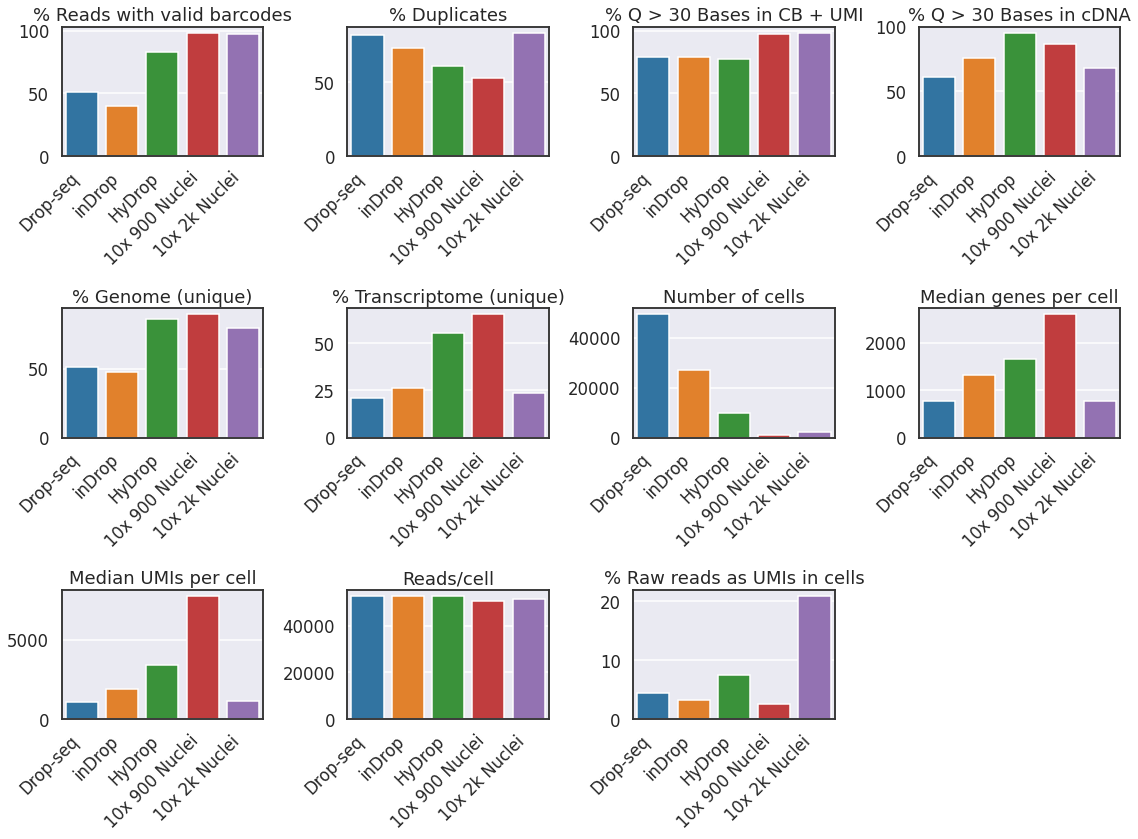

In [189]:
order=['']
fig, axes =plt.subplots(3,4, figsize=(16,12))
axes = axes.flatten()
for statistic in range(0,metadata_all_toplot.shape[1]):
    sns.barplot(y = metadata_all_toplot[metadata_all_toplot.columns[statistic]], 
                x = metadata_all_toplot.index,
                ax = axes[statistic]
               ).set_title(metadata_all_toplot.columns[statistic])
    axes[statistic].set_xticklabels(metadata_all_toplot.index, Rotation=45, ha="right")
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])
    
axes[11].axis('off')
plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/all_starsoloqc.png', dpi=600)
plt.savefig('plts_python/all_starsoloqc.svg', dpi=600)
plt.show()
plt.close()